In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# MODELLING
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

import the csv data as dataframe

In [10]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X and Y variables

In [11]:
X=df.drop(columns=["math score"],axis=1)

In [12]:
y=df["math score"]

In [14]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [15]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [17]:
print("categories in 'gender' variable:  ",end=" ")
print(df["gender"].unique())

print("categories in 'race/ethnicity' variable:  ",end=" ")
print(df["race/ethnicity"].unique())

print("categories in 'parental level of education' variable:  ",end=" ")
print(df["parental level of education"].unique())

print("categories in 'lunch' variable:  ",end=" ")
print(df["lunch"].unique())

print("test preparation course' variable:  ",end=" ")
print(df["test preparation course"].unique())

categories in 'gender' variable:   ['female' 'male']
categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:   ['standard' 'free/reduced']
test preparation course' variable:   ['none' 'completed']


In [20]:
## creat Column Transformer with 3 types of transformers
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


numeric_transformer = StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),

    ]
)

In [21]:
X = preprocessor.fit_transform(X)

In [22]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [24]:
## SEPERATE THE TRAIN AND TEST DATSET
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

Creat an evalute function to give all metrics after model training

In [25]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [28]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbour Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "RANDOM FOREST REGRESSOR":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CATBOOST REGRESSOR":CatBoostRegressor(verbose=False),
    "AdaBoost regressor":AdaBoostRegressor()

}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) #Train models

    #make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

## evaluate train and test data set
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set")
    print("-Root mean squared error: {:.4f}".format(model_train_rmse))
    print("-Root mean absolute error: {:.4f}".format(model_train_mae))
    print("-R2 Score: {:.4f}".format(model_train_r2))

    print("--------------------------------------------------")

    print("Model performance for test set")
    print("-Root mean squared error: {:.4f}".format(model_test_rmse))
    print("-Root mean absolute error: {:.4f}".format(model_test_mae))
    print("-R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    




Linear Regression
Model performance for training set
-Root mean squared error: 5.3293
-Root mean absolute error: 4.2715
-R2 Score: 0.8740
--------------------------------------------------
Model performance for test set
-Root mean squared error: 5.4252
-Root mean absolute error: 4.2222
-R2 Score: 0.8790
Lasso
Model performance for training set
-Root mean squared error: 6.5938
-Root mean absolute error: 5.2063
-R2 Score: 0.8071
--------------------------------------------------
Model performance for test set
-Root mean squared error: 6.5197
-Root mean absolute error: 5.1579
-R2 Score: 0.8253
Ridge
Model performance for training set
-Root mean squared error: 5.3233
-Root mean absolute error: 4.2650
-R2 Score: 0.8743
--------------------------------------------------
Model performance for test set
-Root mean squared error: 5.3904
-Root mean absolute error: 4.2111
-R2 Score: 0.8806
K-Neighbour Regressor
Model performance for training set
-Root mean squared error: 5.7079
-Root mean absolute

In [31]:
df = pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name", "R2_SCORE"])
df = df.sort_values(by=["R2_SCORE"], ascending=False)
df

,Model Name,R2_SCORE
2,Ridge,0.880593
0,Linear Regression,0.879046
7,CATBOOST REGRESSOR,0.851632
5,RANDOM FOREST REGRESSOR,0.851086
8,AdaBoost regressor,0.844653
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbour Regressor,0.783813
4,Decision Tree,0.718561


## so linear regression is best model 

## linear regression

In [32]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.90


In [33]:
# PLoty_pred and y_test

Text(0, 0.5, 'PREDICTED')

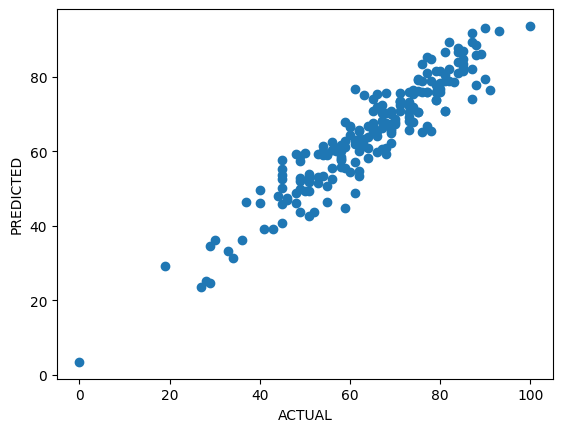

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel("ACTUAL")
plt.ylabel("PREDICTED")

<Axes: xlabel='math score'>

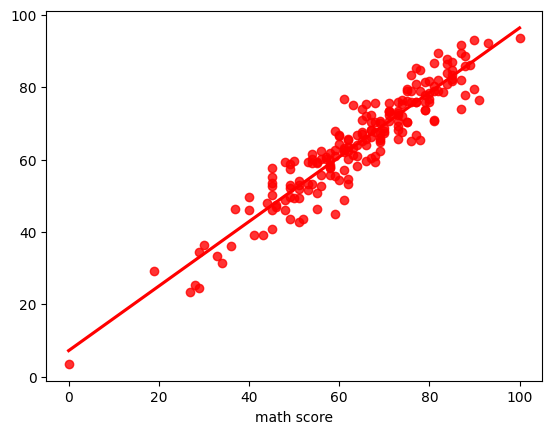

In [35]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="red")

# DIFFERENCE BETWEEN ACTUAL AND PREDICTED VALUES

In [36]:
pred_df=pd.DataFrame({"Actual Values":y_test,"Predicted values":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual Values,Predicted values,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
